In [184]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import Conv2D, Dense, Flatten, BatchNormalization
from mlxtend.data import loadlocal_mnist
import cv2
from mlxtend.data import loadlocal_mnist
from matplotlib import pyplot as plt

In [3]:
classes = 10

In [5]:
X, Y = loadlocal_mnist(images_path='svhn-data/train-images-idx3-ubyte', labels_path='svhn-data/train-labels-idx1-ubyte')

In [90]:
X_test, Y_test = loadlocal_mnist(images_path='svhn-data/t10k-images-idx3-ubyte', labels_path='svhn-data/t10k-labels-idx1-ubyte')

In [6]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [252]:
x = X.reshape((60000,28,28,1))
x_test = X_test.reshape((X_test.shape[0],28,28,1))

In [124]:
def display(img):
    cv2.imshow("img",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [105]:
Y_test = Y_test.reshape((Y_test.shape[0],1))

In [181]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, activation='relu', input_shape = (28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [182]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
qqqqq0000000000000000000000000000000000000000

In [346]:
history = model.fit(data[59000:60004],y[59000:60004], epochs=5)

Epoch 1/5
1004/1004 [==============================] - 3s 3ms/step - loss: 0.0172 - accuracy: 0.9980
Epoch 2/5
1004/1004 [==============================] - 3s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 3/5
1004/1004 [==============================] - 3s 3ms/step - loss: 5.7699e-04 - accuracy: 1.0000
Epoch 4/5
1004/1004 [==============================] - 3s 3ms/step - loss: 3.9934e-04 - accuracy: 1.0000
Epoch 5/5
1004/1004 [==============================] - 3s 3ms/step - loss: 8.4673e-04 - accuracy: 1.0000


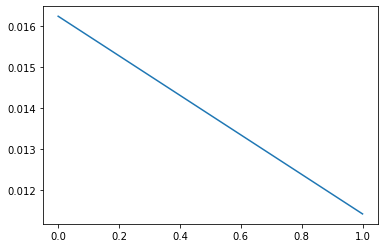

In [300]:
plt.plot(history.history['loss'])
plt.show()

In [347]:
test = model.evaluate(x_test, Y_test)
print("Loss:", test[0])
print("Accuracy:", test[1])

10000/10000 [==============================] - 6s 647us/step
Loss: 0.0897711570638523
Accuracy: 0.9793000221252441


In [157]:
p = 100
print(model.predict(x_test[p].reshape(1,28,28,1)).argmax())
print(Y_test[p])

6
[6]


In [112]:
Y_test[0]

array([7], dtype=uint8)

In [99]:
x_test[0].shape

(28, 28, 1)

In [89]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
flatten_11 (Flatten)         (None, 30976)           

In [114]:
model.save('multi_digits_model_0_9.h5')

In [200]:
img = cv2.imread("svhn-data/images/img6.jpg",0)

In [170]:
img = cv2.resize(img,(28,28))
display(img)

In [171]:
img = img.reshape((1,28,28,1))

In [172]:
model.predict(img).argmax()

8

In [177]:
display(img[0])

In [372]:
h, w = img.shape
u = 0
for i in range(0,h-28+1):
    for j in range(0, w-28+1):
        m = img[i:i+28, j:j+28]
        m = m.reshape((1,28,28,1))
        u += 1
#         if u %100 == 0:
#             display(m[0])
        print(model.predict(m).argmax(), end=" ")

3 

In [195]:
l = img[0:28,0:28]

In [198]:
img.shape

(63, 72)

In [204]:
import os
l = os.system('ls')

In [341]:
import cv2
import os
import glob
img_dir = "/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/svhn-data/train_answer" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1,0)
    img = cv2.resize(img,(28,28))
    img[img < 150] = 0
    img[img > 150] = 255
    data.append(255 - img)

In [342]:
data = np.array(data)

In [343]:
data = data.reshape((6,28,28,1))
yy = np.array([3,5,5,4,5,3])
# yy = yy.reshape((6,1))

In [338]:
Y.shape

(60000,)

In [344]:
data = np.append(x,data,axis=0)
y = np.append(Y,yy,axis=0)

In [354]:
import timeit

In [371]:
tic = timeit.default_timer()
a = model.predict(data[58200:60006])
toc = timeit.default_timer()
print(toc-tic)

1.0427113469995675


In [353]:
a[2]

array([1.1698211e-21, 5.6178435e-18, 3.4721345e-18, 4.6040947e-04,
       5.0442771e-12, 9.9953961e-01, 5.4176902e-19, 8.7099322e-15,
       2.2629338e-09, 1.2682927e-08], dtype=float32)

In [345]:
display(data[60004])

In [352]:
y[60003:60006]

array([4, 5, 3])

In [373]:
model2 = keras.models.load_model('svhn-data/test_32x32.mat')

OSError: Unable to open file (file signature not found)

In [379]:
# Import packages 
import cv2
import numpy as np

#Create MSER object
mser = cv2.MSER_create()

#Your image path i-e receipt path
img = cv2.imread('svhn-data/train_answer/3.jpg')

#Convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

vis = img.copy()

#detect regions in gray scale image
regions, _ = mser.detectRegions(gray)

hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

cv2.polylines(vis, hulls, 1, (0, 255, 0))

cv2.imshow('img', vis)

cv2.waitKey(0)

mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)

for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("text only", text_only)
cv2.waitKey(0)
cv2.destroyAllWindows()